Iris 鸢尾花数据集是一个经典数据集，在统计学习和机器学习领域都经常被用作示例。数据集内包含 3 类共 150 条记录，每类各 50 个数据，每条记录都有 4 项特征：花萼长度、花萼宽度、花瓣长度、花瓣宽度，可以通过这4个特征预测鸢尾花卉属于（iris-setosa, iris-versicolour, iris-virginica）中的哪一品种。

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris 
from pandas import plotting
import math

In [2]:
data = load_iris()

In [3]:
print(dir(data))  # 查看data所具有的属性或方法

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


In [4]:
print(data.feature_names)  # 查看数据集的简介

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
#直接读到pandas的数据框中
df_iris = pd.DataFrame(data=data.data, columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
df_iris.info()  #查看数据集信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
df_iris['Species'] = data.target_names[data.target]

# 探索性分析
先查看数据集各特征列的摘要统计信息：

In [7]:
df_iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


通过Violinplot 和 Pointplot，分别从数据分布和斜率，观察各特征与品种之间的关系：

In [8]:
# 设置颜色主题
antV = ['#1890FF', '#2FC25B', '#FACC14', '#223273', '#8543E0', '#13C2C2', '#3436c7', '#F04864'] 

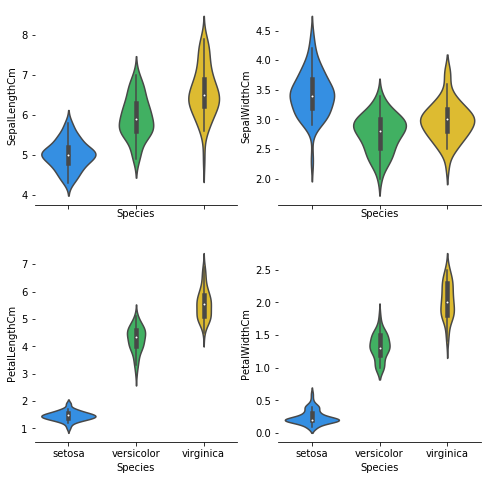

In [9]:
# 绘制  Violinplot
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.despine(left=True)

sns.violinplot(x='Species', y='SepalLengthCm', data=df_iris, palette=antV, ax=axes[0, 0])
sns.violinplot(x='Species', y='SepalWidthCm', data=df_iris, palette=antV, ax=axes[0, 1])
sns.violinplot(x='Species', y='PetalLengthCm', data=df_iris, palette=antV, ax=axes[1, 0])
sns.violinplot(x='Species', y='PetalWidthCm', data=df_iris, palette=antV, ax=axes[1, 1])

plt.show()

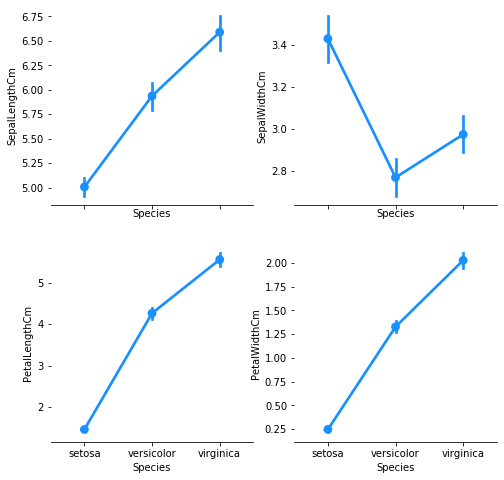

In [10]:
# 绘制  pointplot
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.despine(left=True)

sns.pointplot(x='Species', y='SepalLengthCm', data=df_iris, color=antV[0], ax=axes[0, 0])
sns.pointplot(x='Species', y='SepalWidthCm', data=df_iris, color=antV[0], ax=axes[0, 1])
sns.pointplot(x='Species', y='PetalLengthCm', data=df_iris, color=antV[0], ax=axes[1, 0])
sns.pointplot(x='Species', y='PetalWidthCm', data=df_iris, color=antV[0], ax=axes[1, 1])

plt.show()

生成各特征之间关系的矩阵图：

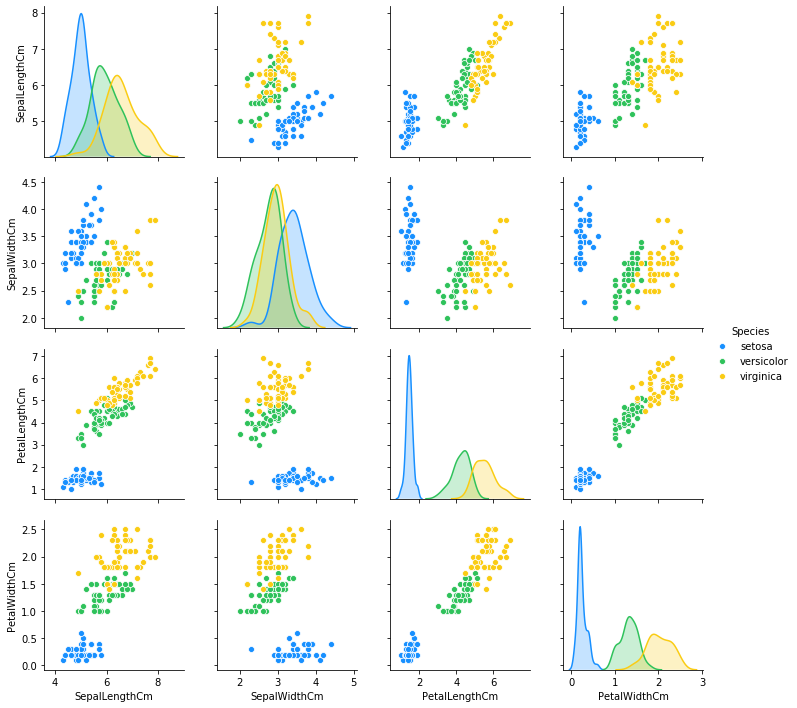

In [11]:
g = sns.pairplot(data=df_iris, palette=antV, hue= 'Species')

使用 Andrews Curves 将每个多变量观测值转换为曲线并表示傅立叶级数的系数，这对于检测时间序列数据中的异常值很有用。

Andrews Curves 是一种通过将每个观察映射到函数来可视化多维数据的方法。

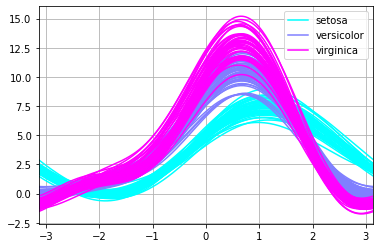

In [24]:
ac = plotting.andrews_curves(df_iris, 'Species', colormap='cool')

下面分别基于花萼和花瓣做线性回归的可视化：

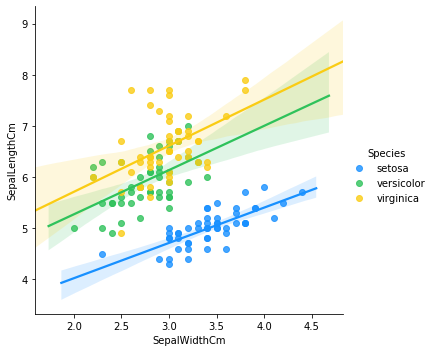

In [25]:
g = sns.lmplot(data=df_iris, x='SepalWidthCm', y='SepalLengthCm', palette=antV, hue='Species')

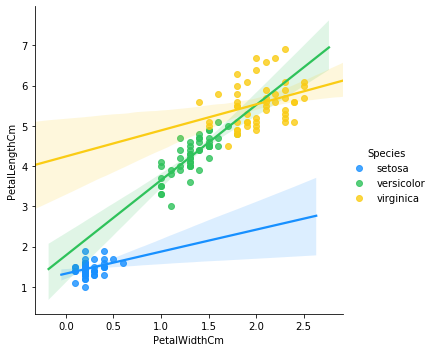

In [26]:
g = sns.lmplot(data=df_iris, x='PetalWidthCm', y='PetalLengthCm', palette=antV, hue='Species')

最后，通过热图找出数据集中不同特征之间的相关性，高正值或负值表明特征具有高度相关性。

从热图可看出，花萼的宽度和长度不相关，而花瓣的宽度和长度则高度相关。

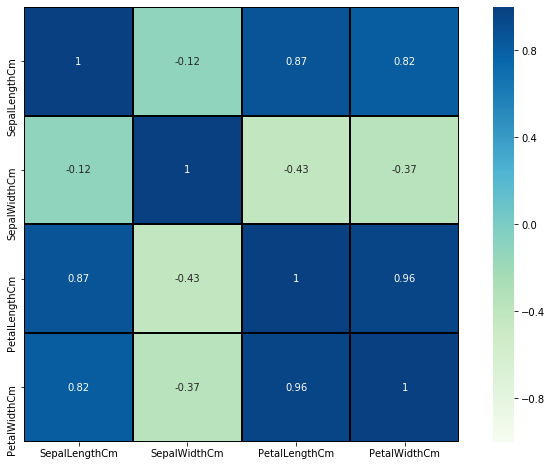

In [28]:
fig=plt.gcf()
fig.set_size_inches(12, 8)
fig=sns.heatmap(df_iris.corr(), annot=True, cmap='GnBu', linewidths=1, linecolor='k', square=True, mask=False, vmin=-1, vmax=1, cbar_kws={"orientation": "vertical"}, cbar=True)